# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.__version__

'1.0.1'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [13]:
hp_df = movies[movies.title.str.contains('Harry Potter')].sort_values(by='year', ascending=False)

### How many movies were made in the year 2017?

In [14]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [15]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [16]:
movies[(movies.year >= 2000) & (movies.year <= 2018)].sort_values(by='year')

,title,year
85445,Shilje sanghwang,2000
36051,Papa the Great,2000
74583,Soal hati,2000
174929,Astitva,2000
228820,The Beach,2000
...,...,...
173415,Weirdo (A Story of Three Lives),2018
219340,The '57 Bushville Champs,2018
119243,The Sandman,2018
42584,The Bridge: Full Circle,2018


In [17]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [18]:
len(movies[movies.title.str.contains("Hamlet")])

57

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [19]:
movies[movies.title.str.contains("Hamlet") & (movies.year >= 200)].sort_values(by='year')

,title,year
181090,Hamlet,1910
124506,Hamlet,1911
118535,Hamlet,1913
142663,A Sagebrush Hamlet,1919
46344,Hamlet,1921
66134,"Han, hun og Hamlet",1922
108528,"Han, hun og Hamlet",1932
73869,Hamlet,1948
140203,Hamlet,1954
155004,Hamlet,1964


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [20]:
num_support_cast = len(cast[cast.title.str.contains(r"^(Inception)$") & (cast.n.isna())])
print(f"Number of supporting cast members in the movie Inception: {num_support_cast}")

C:\Users\rivverg\Anaconda3\envs\mec-miniprojects\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Number of supporting cast members in the movie Inception: 27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [21]:
num_main_cast = len(cast[cast.title.str.contains(r"^(Inception)$") & (~cast.n.isna())])
print(f"Number of main cast members in the movie Inception: {num_main_cast}")

Number of main cast members in the movie Inception: 51


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [22]:
cast[cast.title.str.contains(r"^(Inception)$") & (cast.n <= 10)].sort_values(by='n')

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [23]:
print("All movies with a character with the name Albus Dumbledore")
cast[cast.character.str.contains('Albus Dumbledore')].title

All movies with a character with the name Albus Dumbledore


704984                                       Epic Movie
792419     Harry Potter and the Deathly Hallows: Part 1
792420     Harry Potter and the Deathly Hallows: Part 2
792421              Harry Potter and the Goblet of Fire
792422           Harry Potter and the Half-Blood Prince
792423        Harry Potter and the Order of the Phoenix
792424         Harry Potter and the Prisoner of Azkaban
947789          Harry Potter and the Chamber of Secrets
947790            Harry Potter and the Sorcerer's Stone
1685537                           Ultimate Hero Project
1893421    Harry Potter and the Deathly Hallows: Part 1
2248085                                          Potter
Name: title, dtype: object

In [24]:
cast[cast.character.str.contains('Albus Dumbledore')].name.unique()

array(['Dane Farwell', 'Michael Gambon', 'Richard Harris',
       "George (X) O'Connor", 'Toby Regbo', 'Timothy Tedmanson'],
      dtype=object)

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [25]:
cast[cast.name.str.contains("Keanu Reeves")].character.unique().tolist()

['Kai',
 'Bob Arctor',
 'Paul Sutton',
 'Ted',
 'Eddie Kasalivich',
 'John Constantine',
 'Chevalier Danceny',
 'Jonathan Harker',
 'Dogstar',
 'Julian Gitche',
 'Detective Galban',
 'Jjaks Clayton',
 'Tommy Warneki',
 'Ortiz the Dog Boy',
 'John',
 "Conor O'Neill",
 'Henry Torne',
 'Marlon',
 'John Wick',
 'Johnny Mnemonic',
 'Keanu',
 'Evan',
 'Siddhartha',
 'Donaka Mark',
 'Himself',
 'Don John',
 'Scott Favor',
 'Ron Petrie',
 'Tod',
 'Chris Townsend',
 'Johnny Utah',
 'Matt',
 'Lucas Hill',
 'Julian Mercer',
 'Jack Traven',
 'Keanu Reeves',
 'Detective Tom Ludlow',
 'Nelson Moss',
 'The Dream',
 'Klaatu',
 'Kevin Lomax',
 'Donnie Barksdale',
 'Alex Wyler',
 'Harry',
 'Neo',
 'Hank',
 'Winston Connelly',
 'Rupert Marshetta',
 'Chris Nadeau',
 'Shane Falco',
 'Griffin',
 'Ramsey',
 'Perry Lyman',
 'Dr. Beckham',
 'Martin Loader',
 'Heaver']

In [26]:
num_roles = len(cast[cast.name.str.contains("Keanu Reeves")].character.unique())
print(f"The number of roles played by Keanu Reeves is: {num_roles}")

The number of roles played by Keanu Reeves is: 56


In [27]:
print(f'Leading roles played by Keanu Reeves after 1999')
cast[cast.name.str.contains("Keanu Reeves") & (cast.n == 1) & (cast.year >= 1999)].character.unique().tolist()

Leading roles played by Keanu Reeves after 1999


['Kai',
 'John Constantine',
 "Conor O'Neill",
 'Henry Torne',
 'John Wick',
 'Evan',
 'Lucas Hill',
 'Detective Tom Ludlow',
 'Nelson Moss',
 'Klaatu',
 'Alex Wyler',
 'Neo',
 'Shane Falco',
 'Ramsey']

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [28]:
num_roles = cast[(cast.year >= 1950) & (cast.year <= 1960)].character.count()
print(f"The number of roles from 1950 - 1960: {num_roles}")

The number of roles from 1950 - 1960: 234635


In [29]:
num_roles = cast[(cast.year >= 2007) & (cast.year <= 2017)].character.count()
print(f"The number of roles from 2007 - 2017: {num_roles}")

The number of roles from 2007 - 2017: 1452413


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [30]:
num_lead_roles = cast[(cast.year >= 2000) & (cast.n == 1)].character.count()
print(f"The number of lead roles from 2007 - Present: {num_lead_roles}")

The number of lead roles from 2007 - Present: 60568


In [31]:
num_non_lead_roles = cast[(cast.year >= 2000) & (cast.n != 1) & (~cast.n.isna())].character.count()
print(f"The number of non-leading roles from 2007 - 2017: {num_non_lead_roles}")

The number of non-leading roles from 2007 - 2017: 1001710


In [32]:
num_support_roles = cast[(cast.year >= 2000) & (cast.n.isna())].character.count()
print(f"The number of supporting roles from 2007 - 2017: {num_support_roles}")

The number of supporting roles from 2007 - 2017: 887484


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [33]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
Honeymoon               11
The Three Musketeers    11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

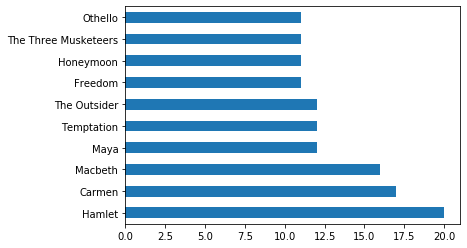

In [34]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [35]:
movies[movies.year >= 2000].year.value_counts()

2017    11474
2016     9440
2015     8702
2014     8264
2018     8041
2013     7896
2012     7398
2011     6988
2010     6415
2009     6125
2008     5151
2007     4467
2006     4296
2005     4030
2004     3512
2003     3177
2002     3019
2001     2896
2000     2779
2019     1115
2020      220
2021       34
2022       18
2024        6
2023        5
2026        1
2025        1
2115        1
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

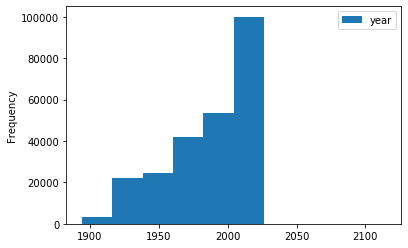

In [42]:
movies.loc[:, 'decade'] = (movies.year/10).astype('int64') * 10
movies.plot.hist(x='decade')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [46]:
cast.character.value_counts().head(10)

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [52]:
cast[cast.character == 'Herself'].groupby(['character', 'name'])['title'].count().sort_values(ascending=False).head(10)

character  name                     
Herself    Queen Elizabeth II           12
           Joyce Brothers                9
           Luisa Horga                   9
           Mar?a Luisa (V) Mart?n        9
           Margaret Thatcher             8
           Hillary Clinton               8
           In?s J. Southern              6
           Mar?a Isabel (III) Mart?n     6
           Marilyn Monroe                6
           Rekha                         6
Name: title, dtype: int64

In [53]:
cast[cast.character == 'Himself'].groupby(['character', 'name'])['title'].count().sort_values(ascending=False).head(10)

character  name                 
Himself    Adolf Hitler             99
           Richard Nixon            44
           Ronald Reagan            41
           John F. Kennedy          37
           George W. Bush           25
           Winston Churchill        24
           Martin Luther King       23
           Bill Clinton             22
           Ron Jeremy               22
           Franklin D. Roosevelt    21
Name: title, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [62]:
cast[cast.character.str.startswith("Zombie")].groupby('title')['name'].count().sort_values(ascending=False)

title
The Eschatrilogy: Book of the Dead                   470
One Last Sunset                                      240
Welcome to Essex                                     204
Not Another Zombie Movie....About the Living Dead    203
Deadlands 2: Trapped                                 199
                                                    ... 
The Brain Eaters                                       1
Hayride                                                1
The Box                                                1
Hei dian                                               1
Zora la vampira                                        1
Name: name, Length: 908, dtype: int64

In [63]:
cast[cast.character.str.startswith("Police")].groupby('title')['name'].count().sort_values(ascending=False)

title
Dekada '70                  36
The Whole Town's Talking    24
Striker                     24
The Pirate Movie            24
The Bounty Hunter           22
                            ..
Lady Beware                  1
Lady Be Good                 1
Lady Bachelors               1
The Elephant Man             1
Home Alone                   1
Name: name, Length: 14502, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

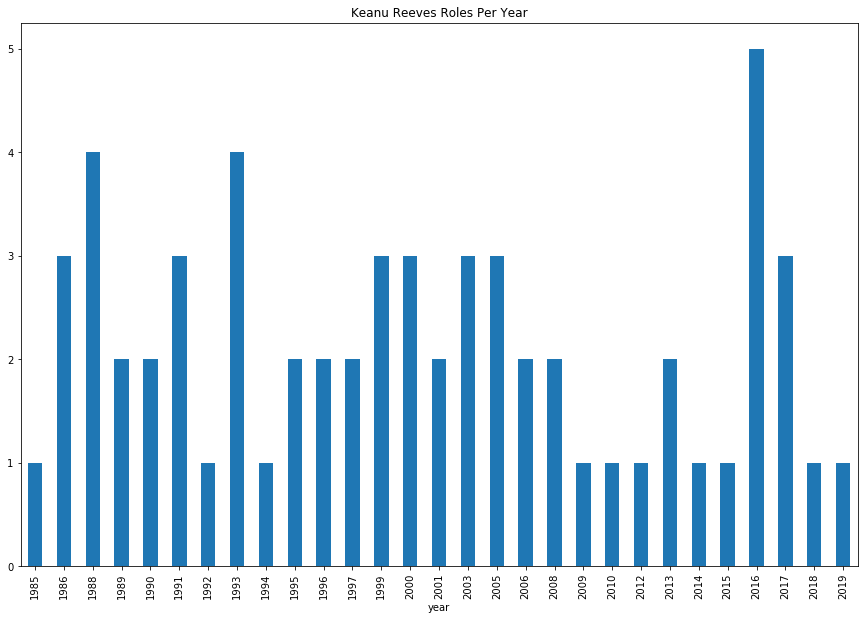

In [74]:
roles_per_year = cast[cast.name.str.contains("Keanu Reeves")].groupby(['year'])['name'].count()
roles_per_year.plot.bar(figsize=(15,10), title="Keanu Reeves Roles Per Year")

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


In [107]:
cast_positions = cast[cast.name.str.contains("Keanu Reeves")].groupby(['n', 'year'])['name'].count().reset_index()


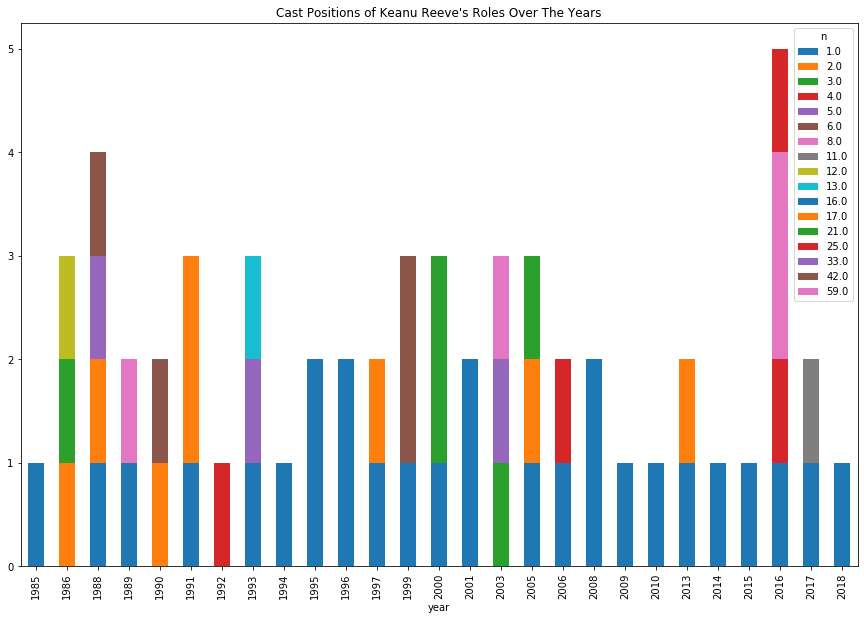

In [122]:
pd.pivot_table(cast_positions, values='name', index='year', columns='n').fillna(0).plot.bar(figsize=(15,10), stacked=True, title='Cast Positions of Keanu Reeve\'s Roles Over The Years');

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

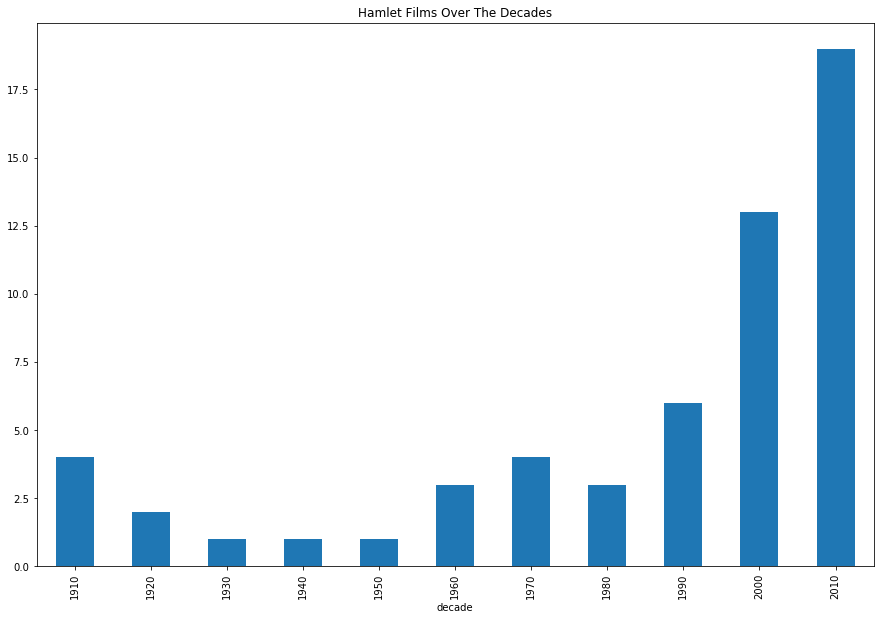

In [136]:
movies[movies.title.str.contains("(Hamlet)")].groupby('decade')['title'].count().plot.bar(figsize=(15,10), title='Hamlet Films Over The Decades');

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [147]:
lead_roles_60s = cast[(cast.n == 1) & cast.type.isin(['actor', 'actress']) & (cast.year >= 1960) & (cast.year <= 1969)].shape[0]
print(f"The number of leading roles in the 1960s: {lead_roles_60s}")

The number of leading roles in the 1960s: 11146


In [152]:
lead_roles_2000s = cast[(cast.n == 1) & cast.type.isin(['actor', 'actress']) & (cast.year >= 2000) & (cast.year <= 2009)].shape[0]
print(f"The number of leading roles in the 1960s: {lead_roles_2000s}")

The number of leading roles in the 1960s: 26344


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [162]:
number_of_roles = cast[cast.name.str.contains("Frank Oz")].groupby(['title', 'year'])['character'].count().reset_index()
number_of_roles[number_of_roles.character > 1].sort_values(by='year')

,title,year,character
24,The Muppet Movie,1979,8
0,An American Werewolf in London,1981,2
22,The Great Muppet Caper,1981,6
20,The Dark Crystal,1982,2
25,The Muppets Take Manhattan,1984,7
2,Follow That Bird,1985,3
23,The Muppet Christmas Carol,1992,7
7,Muppet Treasure Island,1996,4
8,Muppets from Space,1999,4
18,The Adventures of Elmo in Grouchland,1999,3


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [165]:
character_count = cast[cast.name.str.contains("Frank Oz")].groupby(['character'])['name'].count().reset_index()
character_count[character_count.name > 1]

,character,name
0,Animal,6
2,Bert,3
5,Cookie Monster,5
10,Fozzie Bear,4
15,Grover,2
18,Miss Piggy,6
25,Sam the Eagle,5
34,Yoda,6


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

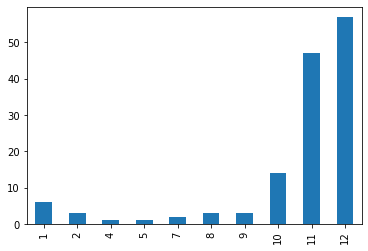

In [166]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

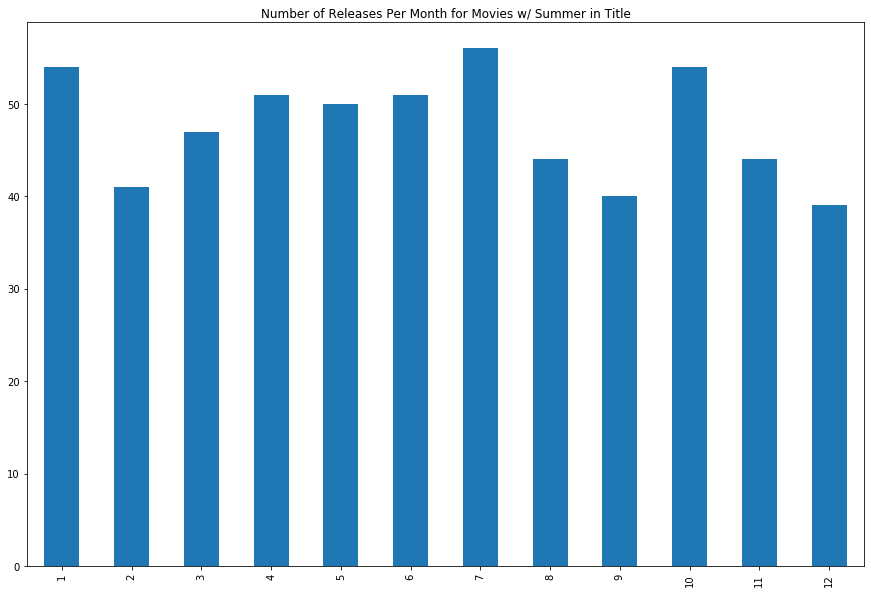

In [184]:
release_dates[release_dates.title.str.contains("Summer")].assign(month=lambda x: x.date.dt.month).month.value_counts().sort_index().plot.bar(title='Number of Releases Per Month for Movies w/ Summer in Title', figsize=(15,10));

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

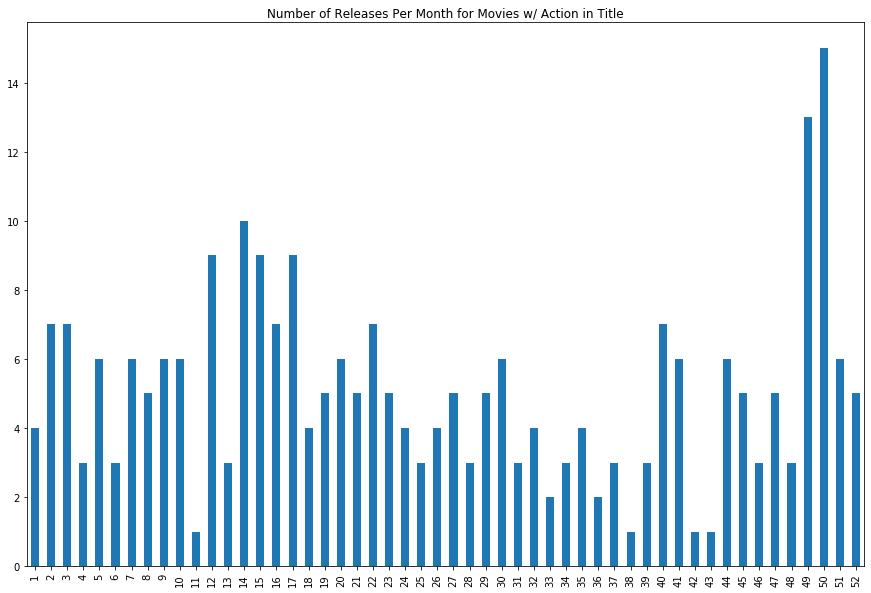

In [182]:
release_dates[release_dates.title.str.contains("Action")].assign(week=lambda x: x.date.dt.week).week.value_counts().sort_index().plot.bar(title='Number of Releases Per Month for Movies w/ Action in Title', figsize=(15,10));

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [192]:
 cast[cast.name.str.contains("Keanu Reeves") & (cast.n == 1)].merge(release_dates[release_dates.country == 'USA'], on=['title', 'year'], how='inner').sort_values(by='date')

,title,year,name,type,character,n,country,date
20,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15
3,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17
2,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,USA,1991-07-19
12,Little Buddha,1993,Keanu Reeves,actor,Siddhartha,1.0,USA,1994-05-25
13,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,USA,1994-06-10
10,Johnny Mnemonic,1995,Keanu Reeves,actor,Johnny Mnemonic,1.0,USA,1995-05-26
1,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,USA,1995-08-11
4,Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0,USA,1996-08-02
6,Feeling Minnesota,1996,Keanu Reeves,actor,Jjaks Clayton,1.0,USA,1996-09-13
17,The Devil's Advocate,1997,Keanu Reeves,actor,Kevin Lomax,1.0,USA,1997-10-17


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

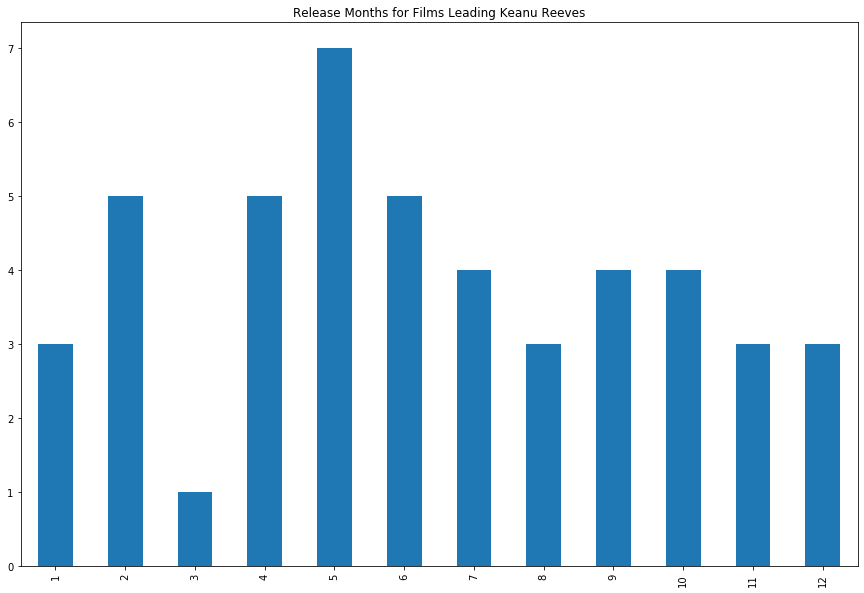

In [198]:
 cast[cast.name.str.contains("Keanu Reeves")].merge(release_dates[release_dates.country == 'USA'], on=['title', 'year'], how='inner').assign(month=lambda x: x.date.dt.month).month.value_counts().sort_index().plot.bar(figsize=(15,10), title='Release Months for Films Featuring Keanu Reeves');

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

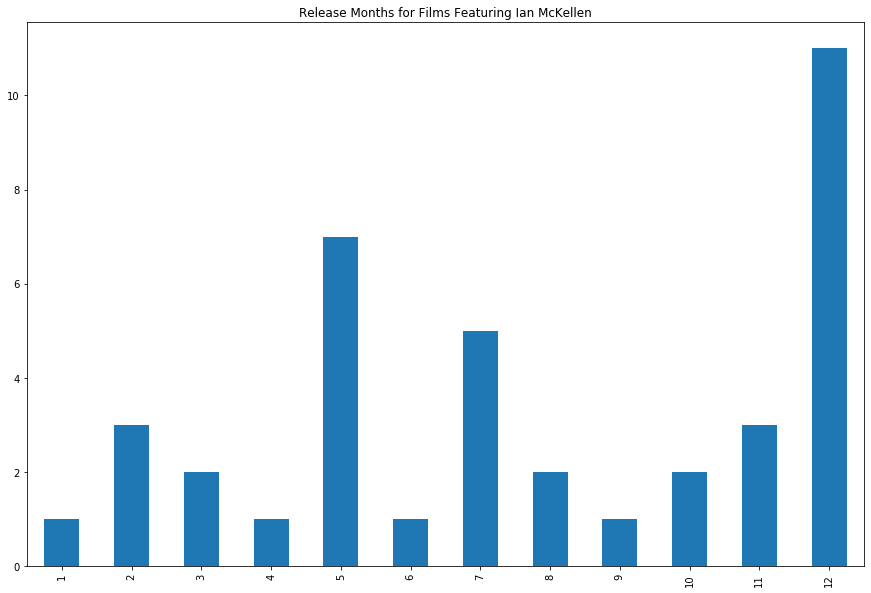

In [200]:
 cast[cast.name.str.contains("Ian McKellen")].merge(release_dates[release_dates.country == 'USA'], on=['title', 'year'], how='inner').assign(month=lambda x: x.date.dt.month).month.value_counts().sort_index().plot.bar(figsize=(15,10), title='Release Months for Films Featuring Ian McKellen');